In [2]:
# Update sklearn to prevent version mismatches
# !conda install scikit-learn
# !conda update scikit-learn
# !conda install joblib 
# !conda update joblib 
# pip install pydotplus

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg



# Read the CSV and Perform Basic Data Cleaning

In [7]:
# Drop the null columns where all values are null
df = pd.read_csv("whd-2015-19.csv")
df = df.dropna(axis='columns', how='all')

In [8]:
new_df_w_continent=df.drop(['country','happiness_rank','year'],axis=1)
new_df_w_continent = new_df_w_continent.apply(lambda x: x.fillna(0),axis=0)

In [9]:
new_df=df.drop(['country','happiness_rank','continent','year'],axis=1)
new_df = new_df.apply(lambda x: x.fillna(0),axis=0)
new_df.head()

happiness_score  gdp_per_capita   family  life_expectancy  freedom  \
0            7.587         1.39651  1.34951          0.94143  0.66557   
1            7.561         1.30232  1.40223          0.94784  0.62877   
2            7.527         1.32548  1.36058          0.87464  0.64938   
3            7.522         1.45900  1.33095          0.88521  0.66973   
4            7.427         1.32629  1.32261          0.90563  0.63297   

   generosity  government_corr  social_support  
0     0.29678          0.41978             0.0  
1     0.43630          0.14145             0.0  
2     0.34139          0.48357             0.0  
3     0.34699          0.36503             0.0  
4     0.45811          0.32957             0.0

In [10]:
new_df.describe()

happiness_score  gdp_per_capita      family  life_expectancy  \
count       782.000000      782.000000  782.000000       782.000000   
mean          5.379018        0.916047    0.595221         0.612416   
std           1.127456        0.407340    0.544504         0.248309   
min           2.693000        0.000000    0.000000         0.000000   
25%           4.509750        0.606500    0.000000         0.440183   
50%           5.322000        0.982205    0.698400         0.647310   
75%           6.189500        1.236187    1.082465         0.808000   
max           7.769000        2.096000    1.610574         1.141000   

          freedom  generosity  government_corr  social_support  
count  782.000000  782.000000       782.000000      782.000000  
mean     0.411091    0.218576         0.125275        0.483171  
std      0.152880    0.122321         0.105844        0.622930  
min      0.000000    0.000000         0.000000        0.000000  
25%      0.309768    0.130000         0.054000        0.000000  
50%      0.431000    0.201982         0.090905        0.000000  
75%      0.531000    0.278832         0.155861        1.174000  
max      0.724000    0.838075         0.551910        1.644000

# Create a Train Test Split


In [11]:
X = new_df.drop("happiness_score", axis=1)
y = new_df.happiness_score
print(X.shape, y.shape)
X

(782, 7) (782,)


gdp_per_capita   family  life_expectancy  freedom  generosity  \
0           1.39651  1.34951          0.94143  0.66557     0.29678   
1           1.30232  1.40223          0.94784  0.62877     0.43630   
2           1.32548  1.36058          0.87464  0.64938     0.34139   
3           1.45900  1.33095          0.88521  0.66973     0.34699   
4           1.32629  1.32261          0.90563  0.63297     0.45811   
5           1.29025  1.31826          0.88911  0.64169     0.23351   
6           1.32944  1.28017          0.89284  0.61576     0.47610   
7           1.33171  1.28907          0.91087  0.65980     0.36262   
8           1.25018  1.31967          0.90837  0.63938     0.47501   
9           1.33358  1.30923          0.93156  0.65124     0.43562   
10          1.22857  1.22393          0.91387  0.41319     0.33172   
11          0.95578  1.23788          0.86027  0.63376     0.25497   
12          1.33723  1.29704          0.89042  0.62433     0.33088   
13          1.02054  0.91451          0.81444  0.48181     0.14074   
14          1.39451  1.24711          0.86179  0.54604     0.40105   
15          0.98124  1.23287          0.69702  0.49049     0.14574   
16          1.56391  1.21963          0.91894  0.61583     0.28034   
17          1.33596  1.36948          0.89533  0.61777     0.45901   
18          1.30782  1.28566          0.89667  0.58450     0.22250   
19          1.42727  1.12575          0.80925  0.64157     0.26428   
20          1.26637  1.28548          0.90943  0.59625     0.51912   
21          1.36011  1.08182          0.76276  0.63274     0.21542   
22          1.04424  1.25596          0.72052  0.42908     0.05841   
23          1.52186  1.02000          1.02525  0.54252     0.31105   
24          1.06353  1.19850          0.79661  0.54210     0.24434   
25          1.32792  1.29937          0.89186  0.61477     0.28214   
26          1.10715  1.12447          0.85857  0.44132     0.33363   
27          1.69042  1.07860          0.79733  0.64040     0.32573   
28          1.27778  1.26038          0.94579  0.55011     0.12332   
29          1.05351  1.24823          0.78723  0.44974     0.11451   
..              ...      ...              ...      ...         ...   
752         0.09400  0.00000          0.35700  0.26900     0.21200   
753         0.38500  0.00000          0.30800  0.32700     0.15300   
754         0.26800  0.00000          0.24200  0.30900     0.25200   
755         0.94900  0.00000          0.83100  0.47000     0.24400   
756         0.71000  0.00000          0.55500  0.52500     0.56600   
757         0.35000  0.00000          0.19200  0.17400     0.19800   
758         0.82000  0.00000          0.73900  0.17800     0.18700   
759         0.33600  0.00000          0.53200  0.34400     0.20900   
760         0.81100  0.00000          0.00000  0.31300     0.07400   
761         0.33200  0.00000          0.44300  0.35600     0.25200   
762         0.91300  0.00000          0.64400  0.24100     0.07600   
763         0.57800  0.00000          0.42600  0.43100     0.24700   
764         0.27500  0.00000          0.41000  0.29300     0.17700   
765         0.75500  0.00000          0.58800  0.49800     0.20000   
766         0.07300  0.00000          0.44300  0.37000     0.23300   
767         0.27400  0.00000          0.50500  0.14200     0.27500   
768         0.27400  0.00000          0.55500  0.14800     0.16900   
769         0.48900  0.00000          0.16800  0.35900     0.10700   
770         0.04600  0.00000          0.38000  0.22000     0.17600   
771         0.36600  0.00000          0.43300  0.36100     0.15100   
772         0.32300  0.00000          0.44900  0.02600     0.41900   
773         1.04100  0.00000          0.53800  0.45500     0.02500   
774         0.61900  0.00000          0.44000  0.01300     0.33100   
775         0.19100  0.00000          0.49500  0.44300     0.21800   
776         0.28700  0.00000          0.46300  0.14300     0.10800   
777         0.3

In [12]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
5      7.406
6      7.378
7      7.364
8      7.286
9      7.284
10     7.278
11     7.226
12     7.200
13     7.187
14     7.119
15     6.983
16     6.946
17     6.940
18     6.937
19     6.901
20     6.867
21     6.853
22     6.810
23     6.798
24     6.786
25     6.750
26     6.670
27     6.611
28     6.575
29     6.574
       ...  
752    4.418
753    4.390
754    4.374
755    4.366
756    4.360
757    4.350
758    4.332
759    4.286
760    4.212
761    4.189
762    4.166
763    4.107
764    4.085
765    4.015
766    3.975
767    3.973
768    3.933
769    3.802
770    3.775
771    3.663
772    3.597
773    3.488
774    3.462
775    3.410
776    3.380
777    3.334
778    3.231
779    3.203
780    3.083
781    2.853
Name: happiness_score, Length: 782, dtype: float64

# Train test_split to create training and testing data


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
#creating the model using LinearRegression
from sklearn.linear_model import LinearRegression
model_n = LinearRegression()

In [15]:
# Fit the model to the training data and calculate the scores for the training and testing data 
model_n.fit(X_train, y_train)
training_score = model_n.score(X_train, y_train)
testing_score = model_n.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7804958836281554
Testing Score: 0.7255338949205835


In [16]:
print("Intercept", model_n.intercept_)

Intercept 2.1709104274842916


In [17]:
print("Coefficients", model_n.coef_)

Coefficients [0.95038985 0.83456657 1.15166485 1.59090688 0.21018595 1.03319443
 0.65508653]


In [18]:
coef = zip(X.columns, model_n.coef_)
coef_df = pd.DataFrame(list(zip(X.columns, model_n.coef_)), columns=["Features","Coefficients"])
coef_df

Features  Coefficients
0   gdp_per_capita      0.950390
1           family      0.834567
2  life_expectancy      1.151665
3          freedom      1.590907
4       generosity      0.210186
5  government_corr      1.033194
6   social_support      0.655087

# Regression Equation
# Happiness Score= 2.1709104274842916+ 0.950390*gdp_per_capita +0.655087*social_support +1.151665*life_expectancy + 1.590907*freedom +0.210186*generosity + 1.033194*government_corr +0.834567*family

Text(0.5, 1.0, 'Residual Plot')

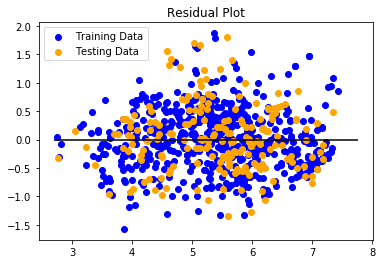

In [19]:
# Plot the Residuals for the Training and Testing data
plt.scatter(model_n.predict(X_train), model_n.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model_n.predict(X_test), model_n.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")


In [20]:
from __future__ import division
import seaborn as sns

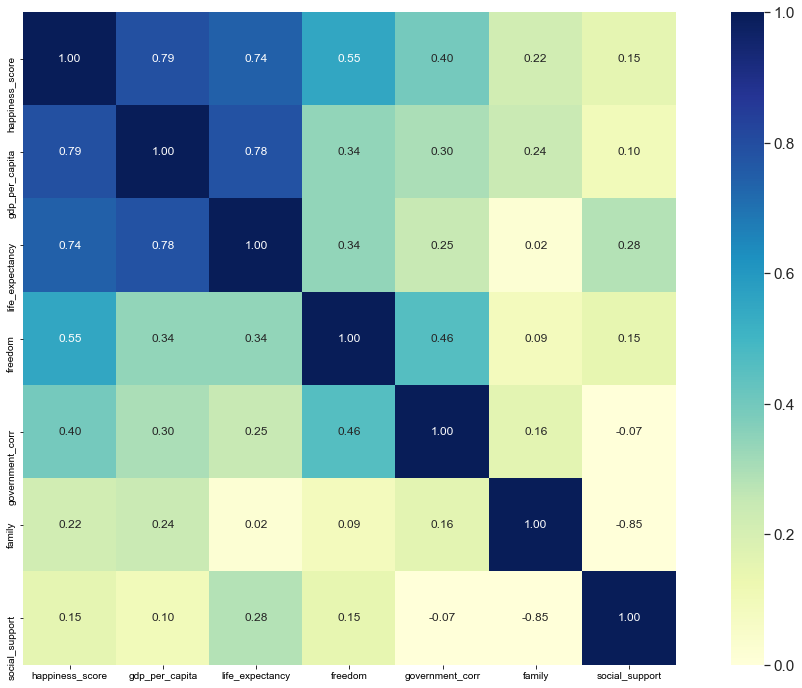

In [21]:
#number of variables for heatmap
k = 7
corrmat = new_df.corr()
cols = corrmat.nlargest(k, "happiness_score")["happiness_score"].index
cm = np.corrcoef(new_df[cols].values.T)
f, ax = plt.subplots(figsize=(20, 12))
sns.set(font_scale=1.4)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12},
                 yticklabels=cols.values, xticklabels=cols.values,vmax=1, vmin=0, cmap='YlGnBu')
hm.set_ylim([7,0])
g0 = plt.show()

In [22]:
f.savefig('sns_heatmap.png')

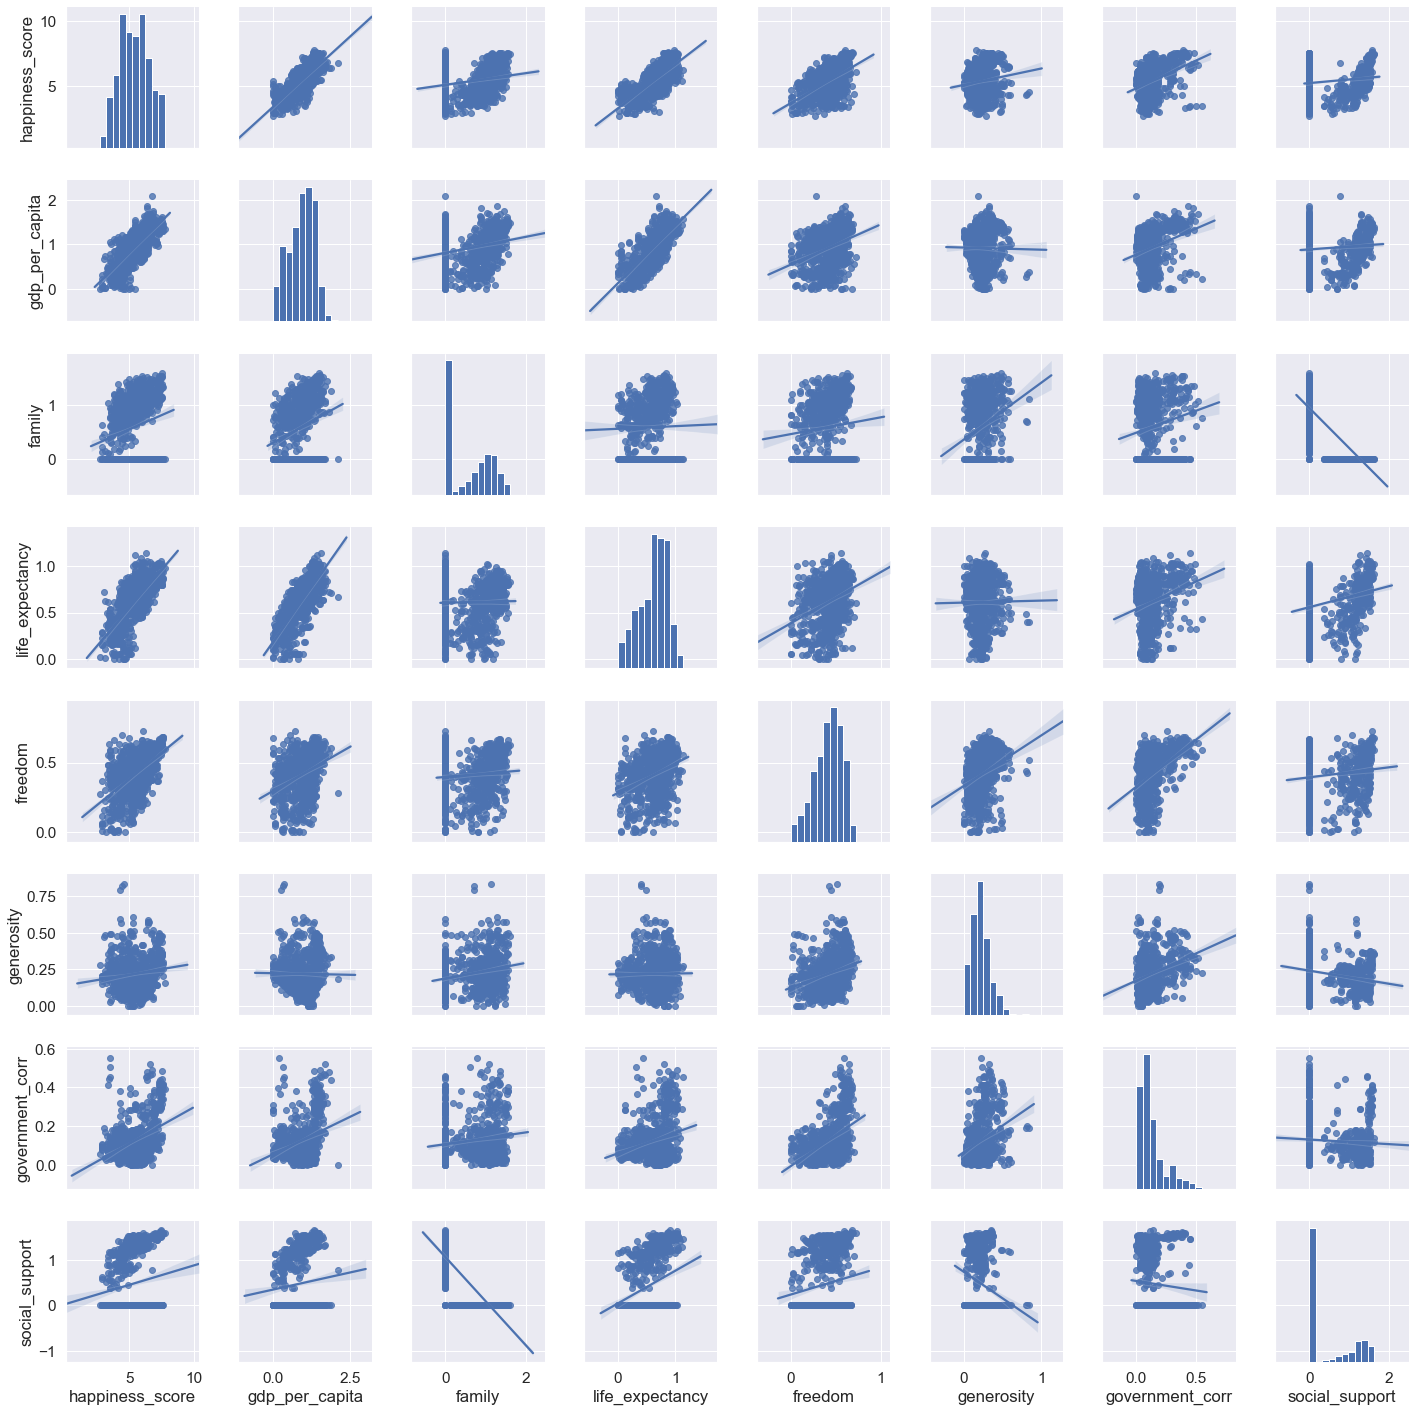

In [23]:
# with regression
g1 = sns.pairplot(new_df, kind="reg")


In [24]:
g1.savefig('sns_pairplot1.png')

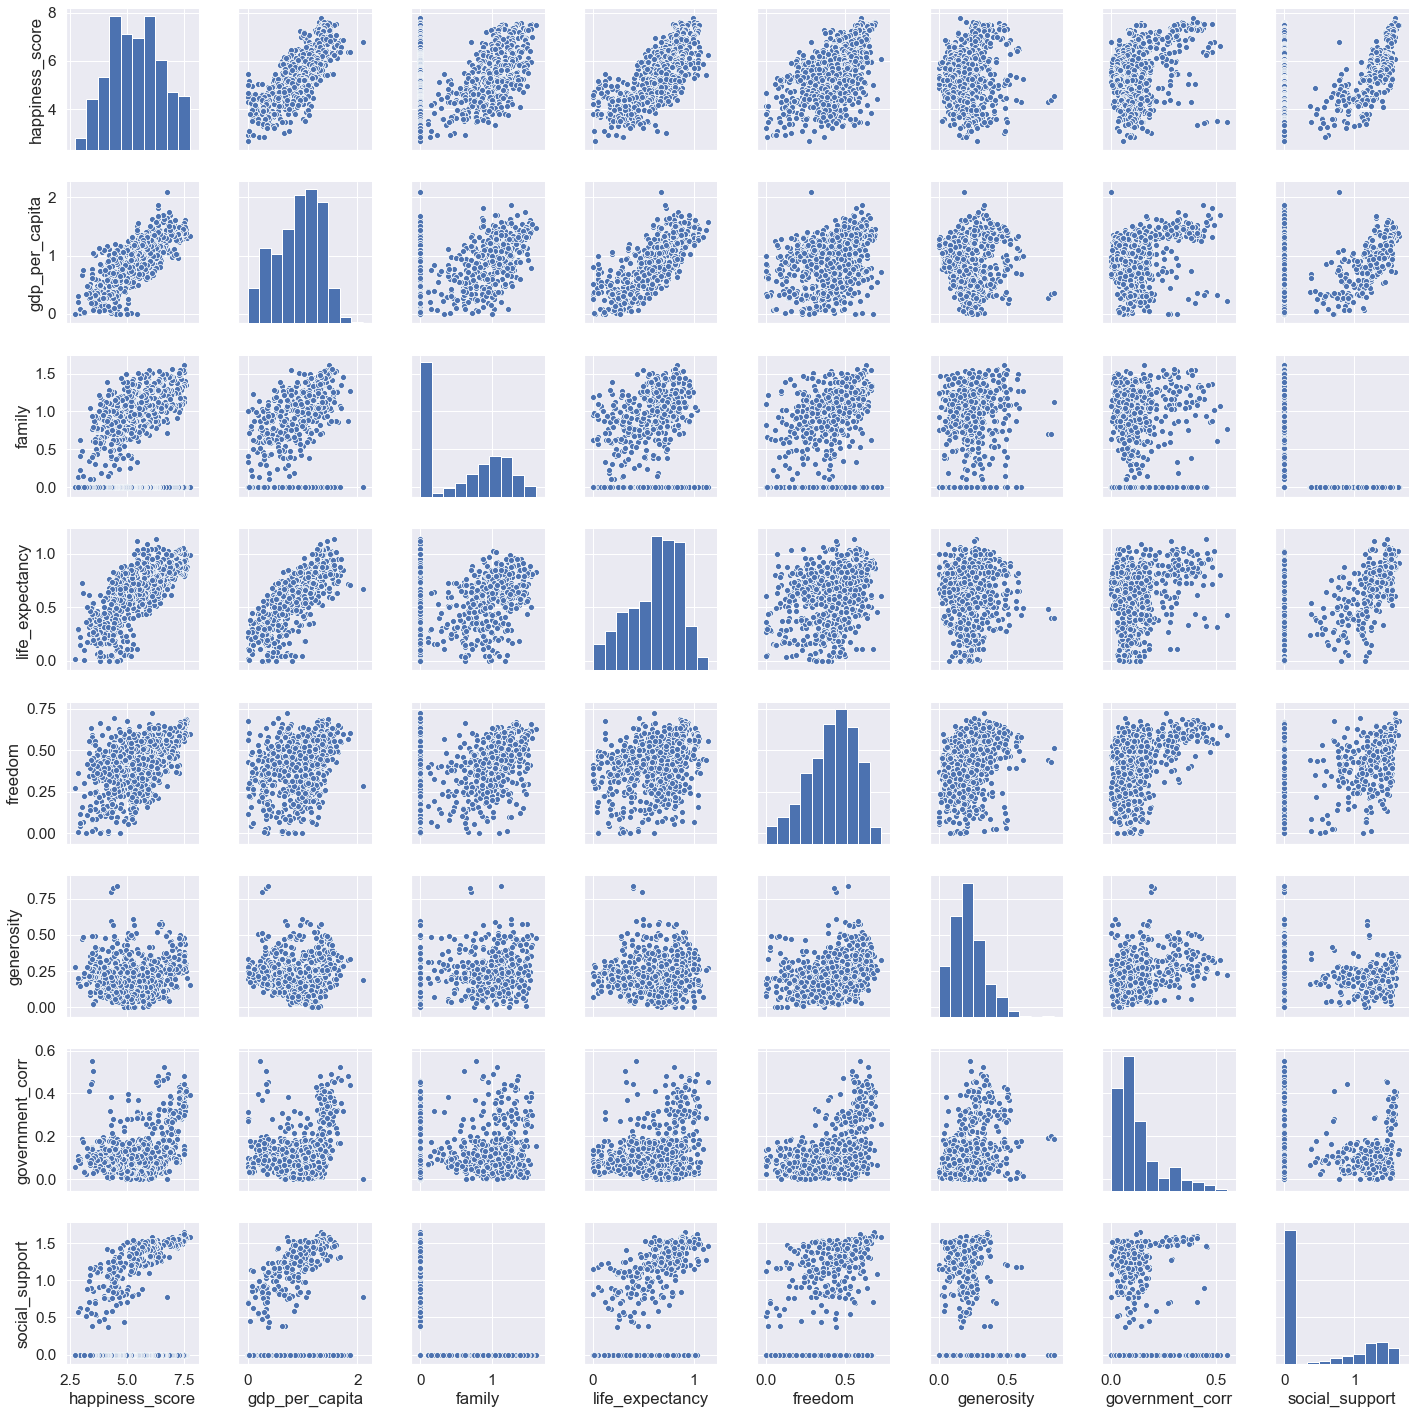

In [25]:
 # without regression
g2 = sns.pairplot(new_df, kind="scatter")
# plt.show()

In [26]:
g2.savefig('sns_pairplot2.png')

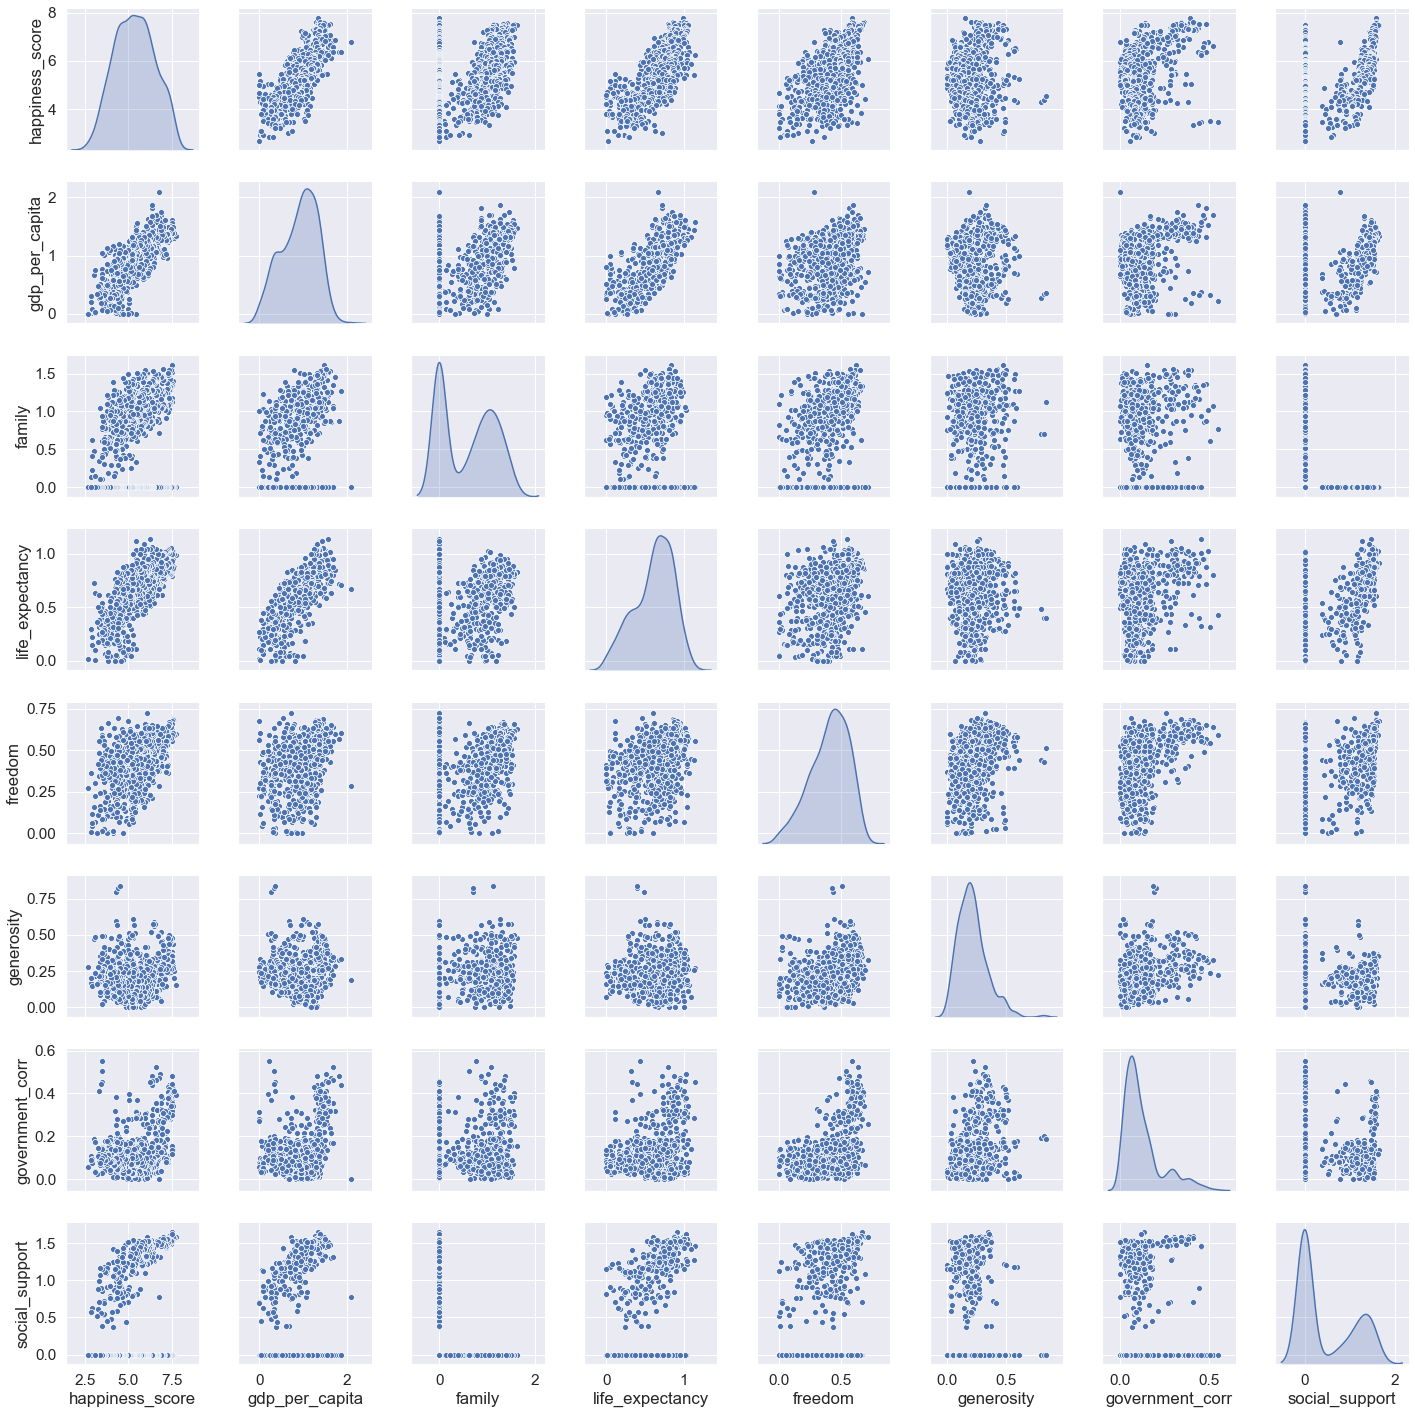

In [27]:
g3 = sns.pairplot(new_df, diag_kind="kde")


In [28]:
g3.savefig('sns_pairplot3.png')

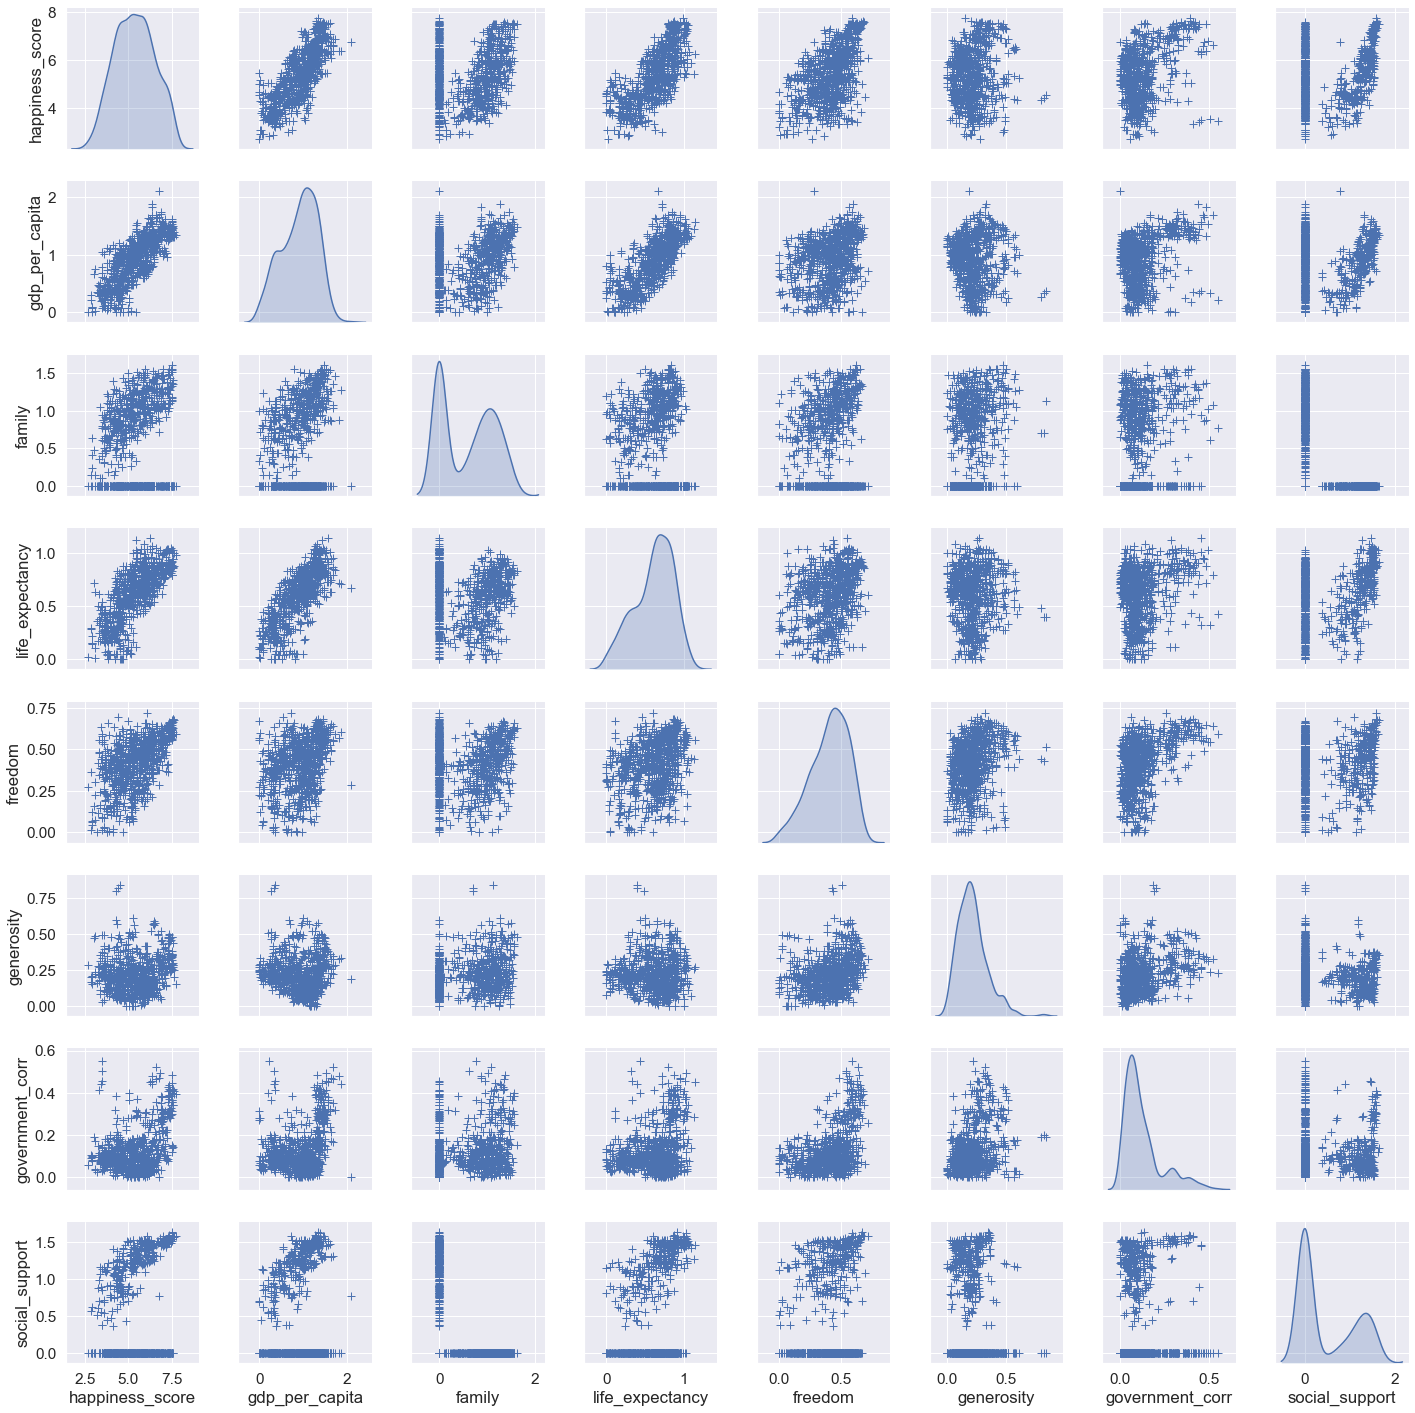

In [29]:
g4 = sns.pairplot(new_df, diag_kind="kde", markers="+",
                 plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                 diag_kws=dict(shade=True))

In [30]:
g4.savefig('sns_pairplot4.png')

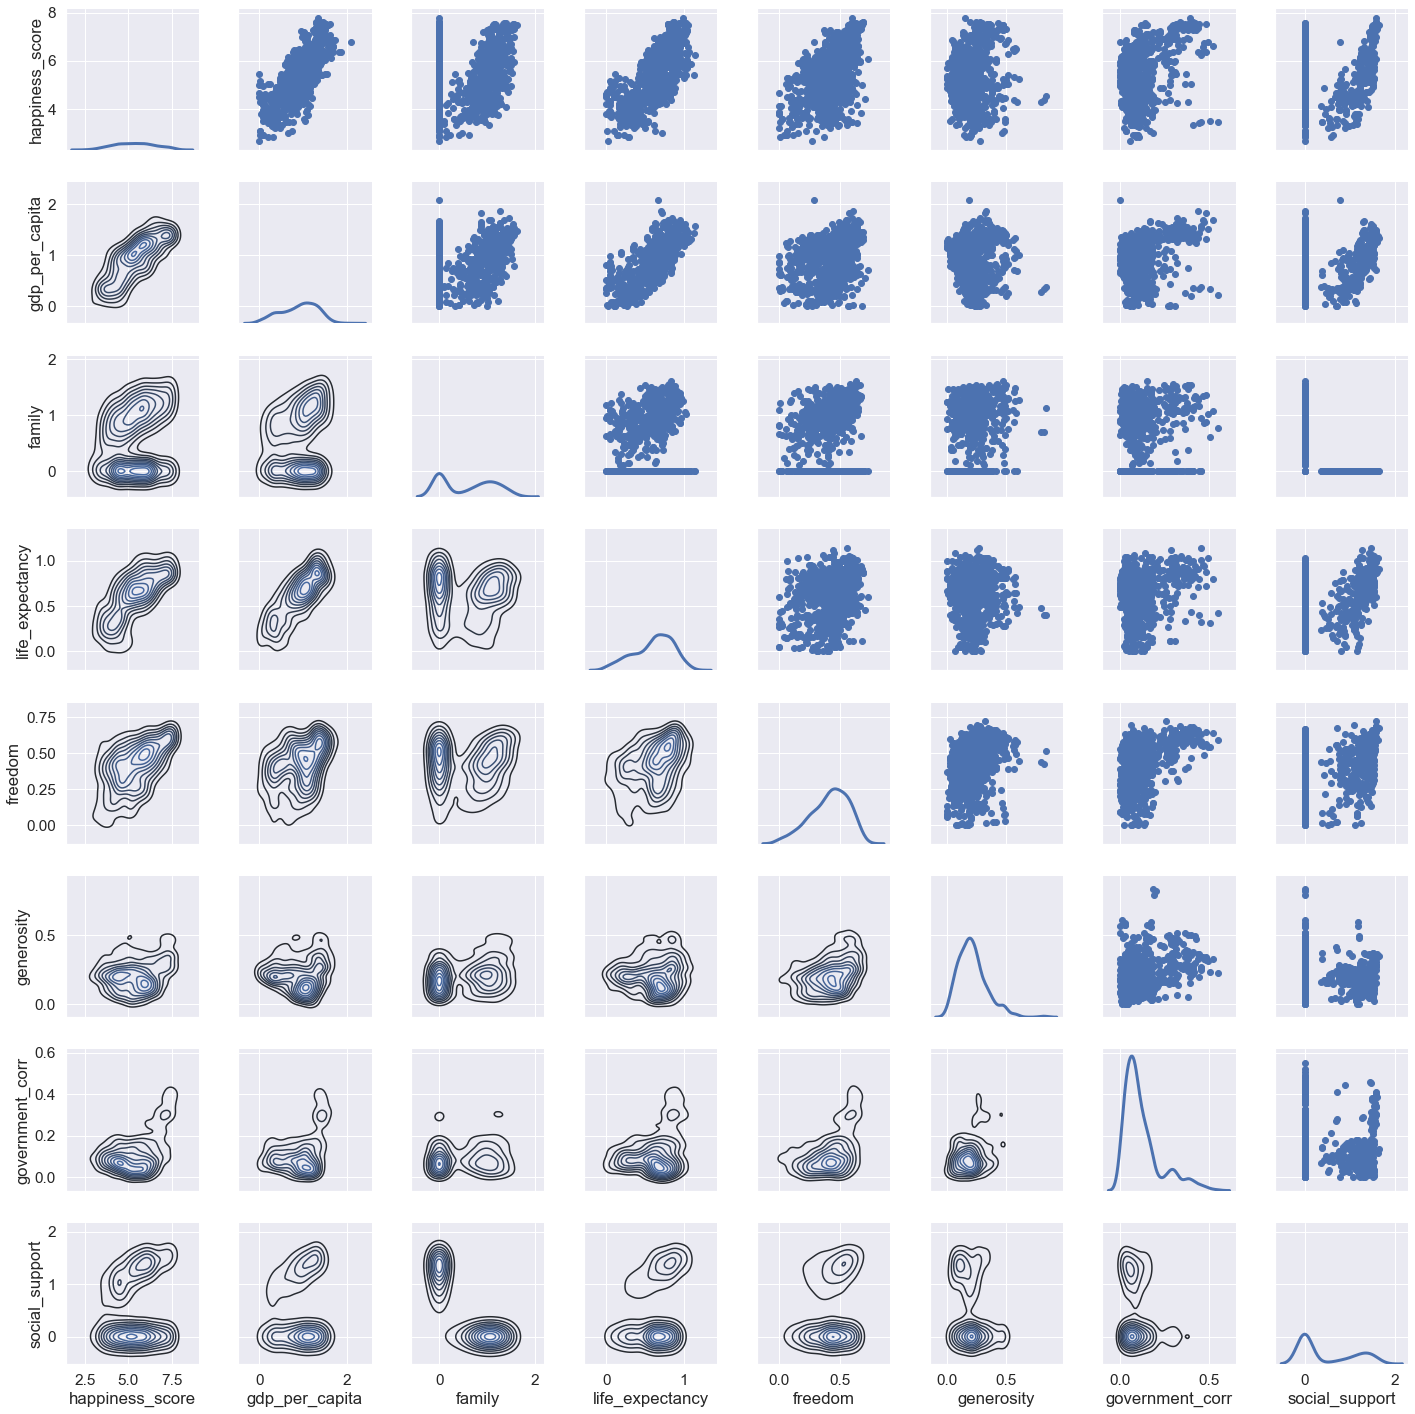

In [31]:
g5 = sns.PairGrid(new_df)
g5.map_upper(plt.scatter)
g5.map_lower(sns.kdeplot)
g5.map_diag(sns.kdeplot, lw=3, legend=False);

In [32]:
g5.savefig('sns_pairplot5.png')

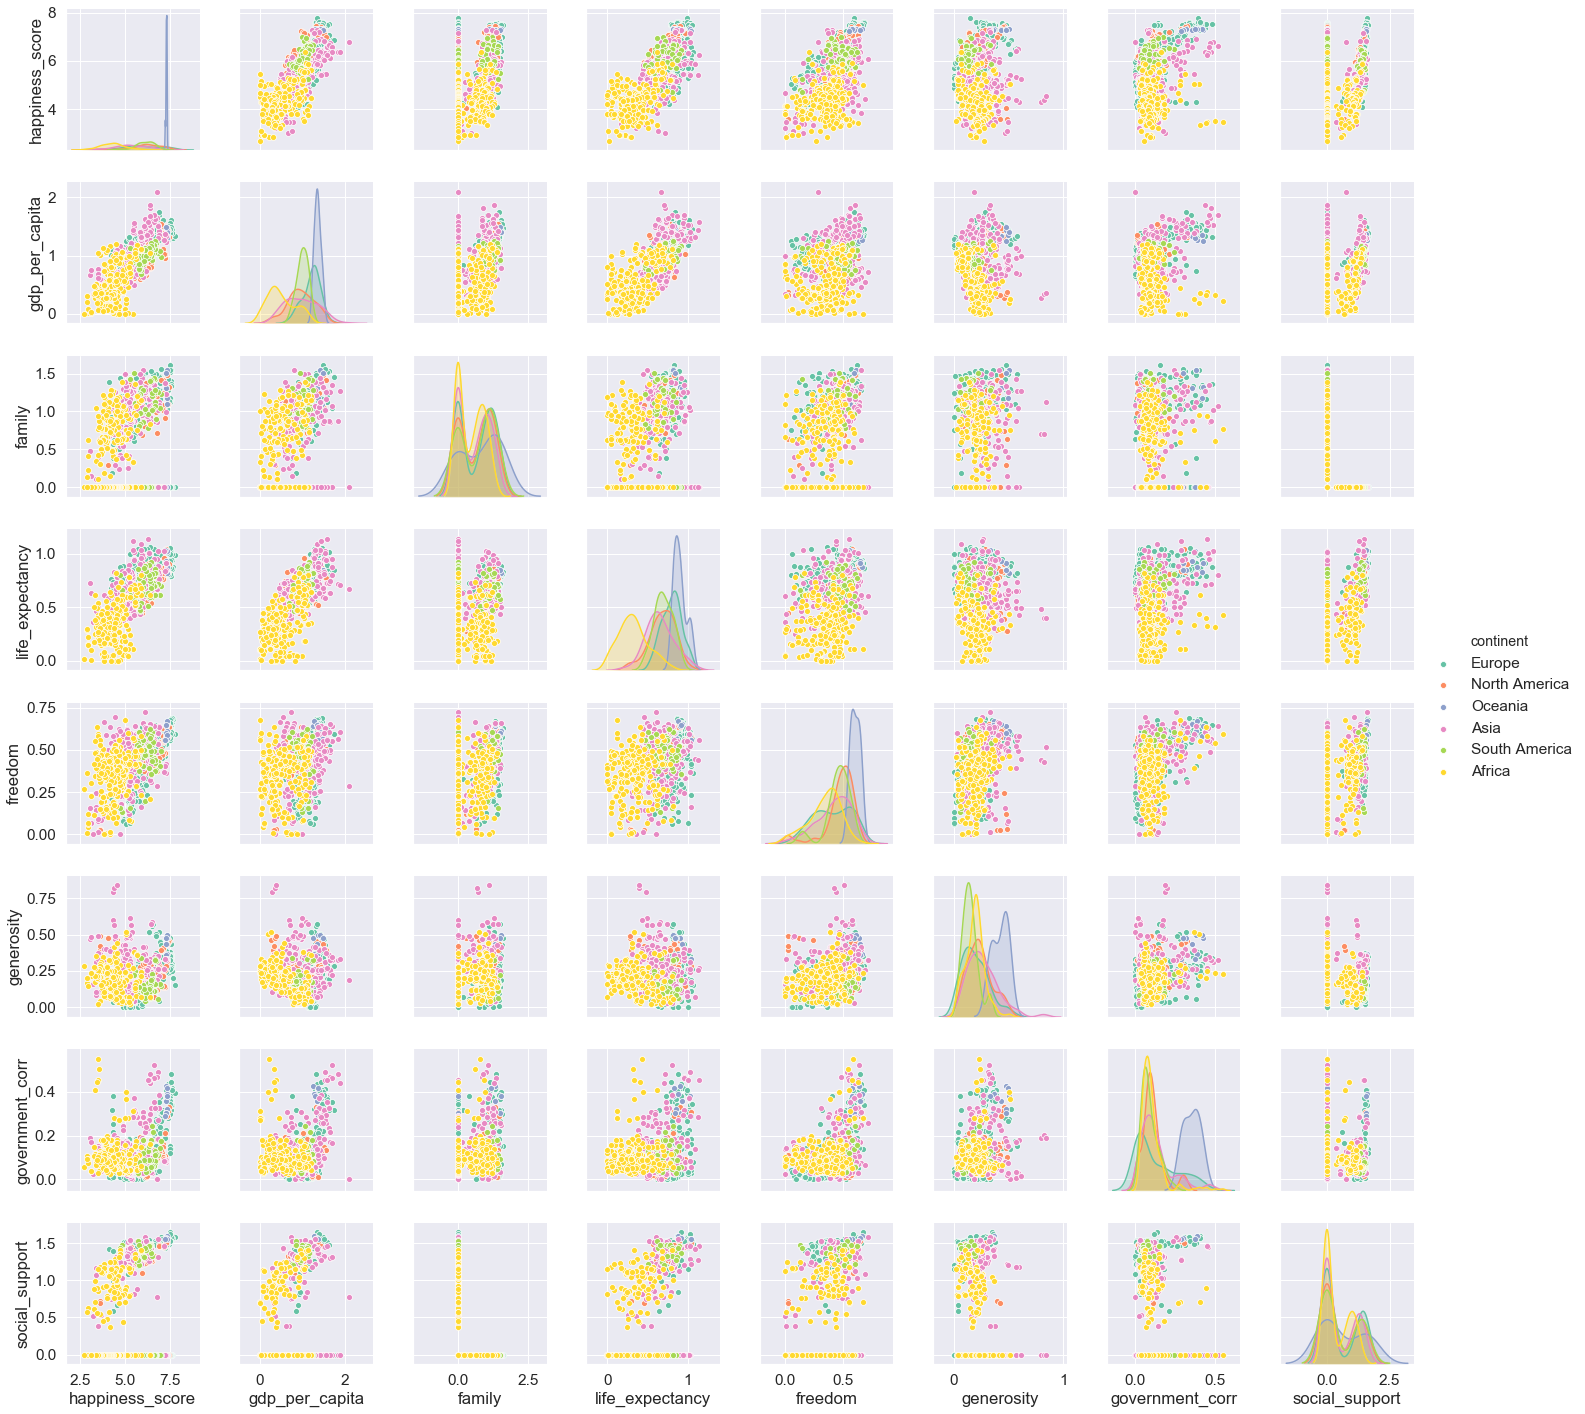

In [33]:
g6 = sns.pairplot(new_df_w_continent, hue="continent", palette="Set2", diag_kind="kde", height=2.5)


In [34]:
g6.savefig('sns_pairplot6.png')

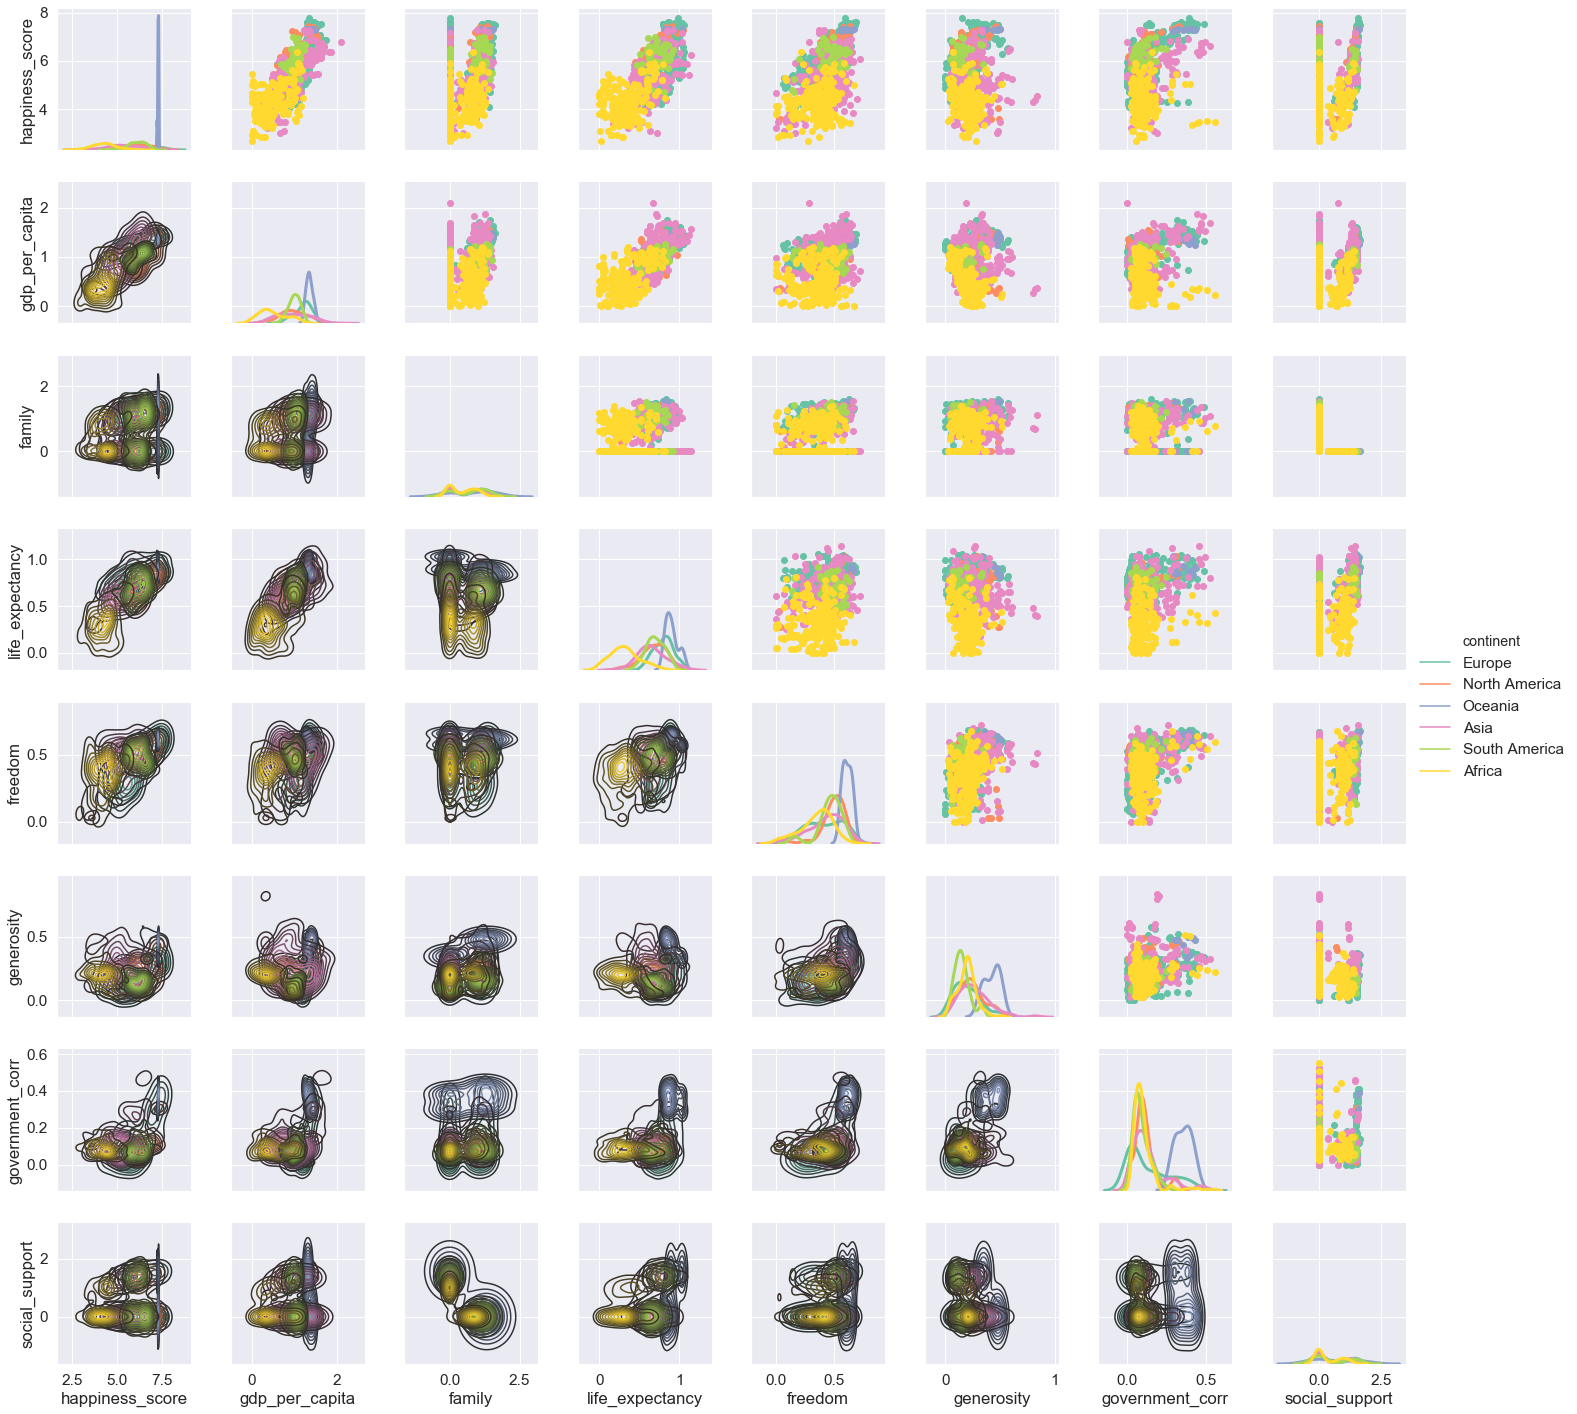

In [35]:
g7 = sns.PairGrid(new_df_w_continent, hue="continent", palette="Set2", height=2.5)
g7.map_upper(plt.scatter)
g7.map_lower(sns.kdeplot)
g7.map_diag(sns.kdeplot, lw=3, legend=False);
g7 = g7.add_legend()

In [36]:
g7.savefig('sns_pairplot7.png')

In [49]:
#DecisionTree

In [4]:
df = pd.read_csv("mlds.csv")

print(df)

     Score  Health  Relationship  Beauty  Living  Support  Outcome
0        1      10            10      10      10       10        4
1        1      10            10      10      10        5        4
2        1      10            10      10       5       10        4
3        1      10            10       5      10       10        4
4        1      10             5      10      10       10        4
5        1       5            10      10      10       10        4
6        0      10            10      10      10       10        3
7        0      10            10      10      10        5        3
8        0      10            10      10       5       10        3
9        0      10            10       5      10       10        3
10       0      10             5      10      10       10        3
11       0       5            10      10      10       10        3
12       1      10            10      10      10        1        3
13       1      10            10      10       5        5     

In [5]:
pip install graphviz 

Note: you may need to restart the kernel to use updated packages.


In [6]:
features = ['Score', 'Health', 'Relationship', 'Beauty', 'Living', 'Support']

X = df[features]
y = df['Outcome']

print(X)
print(y)

     Score  Health  Relationship  Beauty  Living  Support
0        1      10            10      10      10       10
1        1      10            10      10      10        5
2        1      10            10      10       5       10
3        1      10            10       5      10       10
4        1      10             5      10      10       10
5        1       5            10      10      10       10
6        0      10            10      10      10       10
7        0      10            10      10      10        5
8        0      10            10      10       5       10
9        0      10            10       5      10       10
10       0      10             5      10      10       10
11       0       5            10      10      10       10
12       1      10            10      10      10        1
13       1      10            10      10       5        5
14       1      10            10      10       5        1
15       1      10            10      10       1       10
16       1    

In [7]:
import pydotplus

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features,
        filled=True, rounded=True,  
        special_characters=True)  
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('decisiontree.png')

True

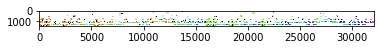

In [8]:
img=pltimg.imread('decisiontree.png')
imgplot = plt.imshow(img)
plt.show()

In [9]:
print(dtree.predict([[0, 3, 5, 1, 5, 3]]))

[0]


In [10]:
print(dtree.predict([[5, 5, 5, 1, 5, 3]]))

[1]


In [11]:
print(dtree.predict([[5, 1, 3, 1, 5, 3]]))

[1]


In [12]:
print(dtree.predict([[5, 1, 1, 1, 3, 3]]))

[1]


In [13]:
print(dtree.predict([[0, 5, 5, 5, 5, 5]]))

[0]
